# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | al 'alamayn
City not found. Skipping...
Processing Record 2 of Set 1 | saldanha
Processing Record 3 of Set 1 | petropavlovsk-kamchatsky
Processing Record 4 of Set 1 | vorgashor
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | ust'-kulom
Processing Record 7 of Set 1 | nemuro
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | rantauprapat
Processing Record 13 of Set 1 | invercargill
Processing Record 14 of Set 1 | pajapan
Processing Record 15 of Set 1 | kalmunai
Processing Record 16 of Set 1 | tazovsky
Processing Record 17 of Set 1 | margaret river
Processing Record 18 of Set 1 | virar
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | jayapura
Processing Record 21 of Set 1 | postmasburg
City not fou

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saldanha,-33.0117,17.9442,21.03,94,6,6.21,ZA,1707764390
1,petropavlovsk-kamchatsky,53.0452,158.6483,-18.08,81,0,3.58,RU,1707764367
2,vorgashor,67.5833,63.9500,-36.91,100,64,1.36,RU,1707764366
3,grytviken,-54.2811,-36.5092,3.76,94,100,1.00,GS,1707764358
4,ust'-kulom,61.6864,53.6902,-12.53,97,100,1.48,RU,1707764565


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("..\output_data\cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saldanha,-33.0117,17.9442,21.03,94,6,6.21,ZA,1707764390
1,petropavlovsk-kamchatsky,53.0452,158.6483,-18.08,81,0,3.58,RU,1707764367
2,vorgashor,67.5833,63.9500,-36.91,100,64,1.36,RU,1707764366
3,grytviken,-54.2811,-36.5092,3.76,94,100,1.00,GS,1707764358
4,ust'-kulom,61.6864,53.6902,-12.53,97,100,1.48,RU,1707764565


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

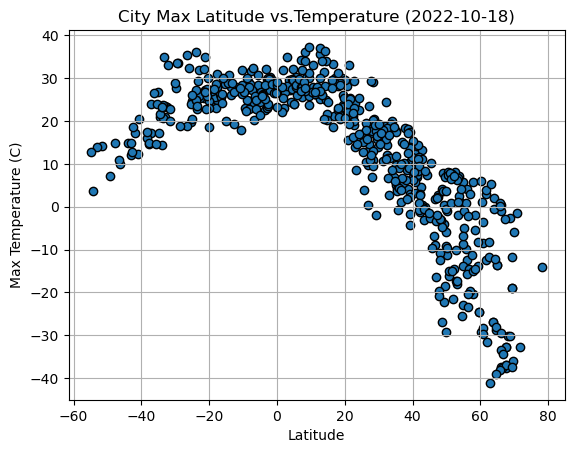

In [16]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs.Temperature (2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

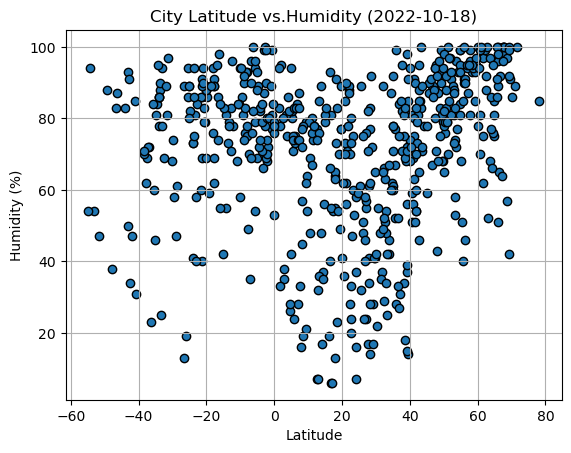

In [17]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs.Humidity (2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

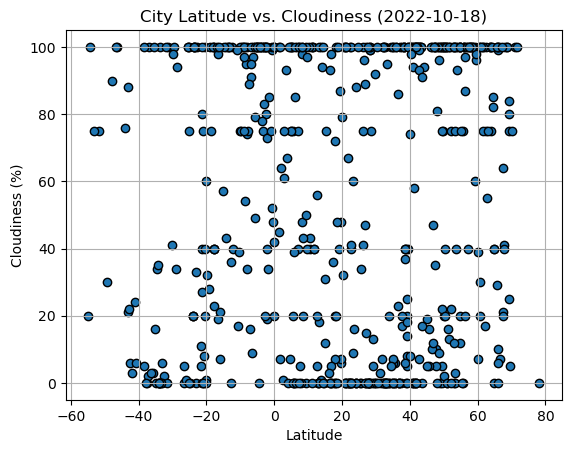

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

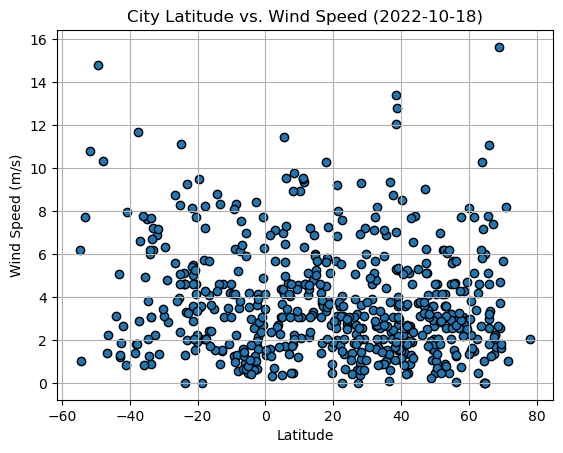

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [29]:
# Define a function to create Linear Regression plots
def linear_reg(x_axis, y_axis,eq_loc):  
    #setting correlation method
    correlation = st.pearsonr(x_axis,y_axis)
    p_slope, p_int, p_r, p_p, p_std_err = st.linregress(x_axis, y_axis)
    #creating line equation
    p_fit = p_slope * x_axis + p_int
    #printing line equation
    eq= f"y ={p_slope: .2f}x +{ p_int: .2f}"
       
    #Plot the line
    plt.scatter(x_axis, y_axis ,marker="o")
    plt.plot(x_axis,p_fit,"--", color='red')
    plt.annotate(eq, eq_loc, fontsize=12, color='red')
    print(f"The r-value is {correlation[0]}")

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,petropavlovsk-kamchatsky,53.0452,158.6483,-18.08,81,0,3.58,RU,1707764367
2,vorgashor,67.5833,63.9500,-36.91,100,64,1.36,RU,1707764366
4,ust'-kulom,61.6864,53.6902,-12.53,97,100,1.48,RU,1707764565
5,nemuro,43.3236,145.5750,-3.17,83,100,4.63,JP,1707764381
10,rantauprapat,2.1000,99.8333,23.07,95,64,0.31,ID,1707764565


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saldanha,-33.0117,17.9442,21.03,94,6,6.21,ZA,1707764390
3,grytviken,-54.2811,-36.5092,3.76,94,100,1.00,GS,1707764358
6,blackmans bay,-43.0167,147.3167,12.07,93,88,1.21,AU,1707764357
7,puerto natales,-51.7236,-72.4875,14.25,47,75,10.80,CL,1707764362
8,bredasdorp,-34.5322,20.0403,21.02,84,34,3.81,ZA,1707764384


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8751819449857506


Text(0, 0.5, 'Temperature(C)')

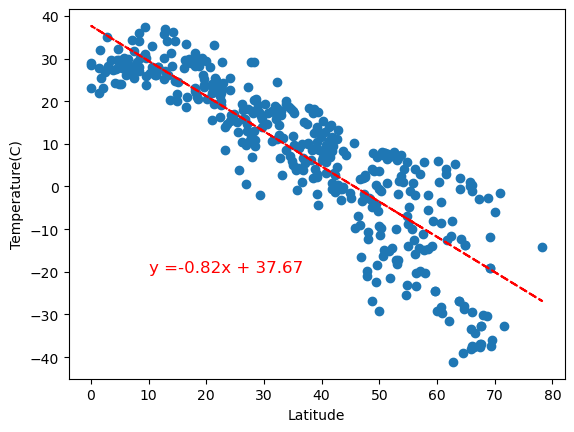

In [34]:
# Linear regression on Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],(10, -20))
plt.xlabel('Latitude')
plt.ylabel('Temperature(C)')

The r-value is 0.607997460821421


Text(0, 0.5, 'Temperature (C)')

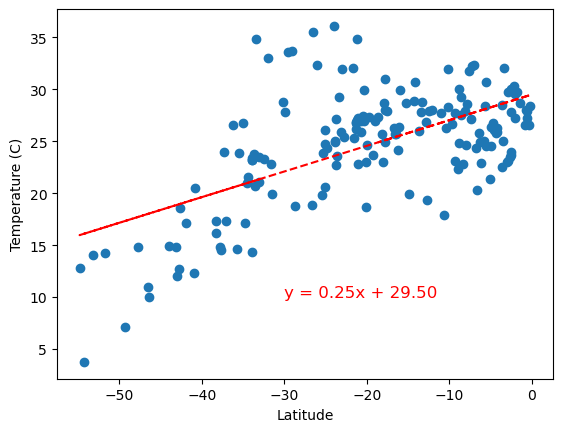

In [35]:
# Linear regression on Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],(-30, 10))
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')

**Discussion about the linear relationship:** 
The temperature vs. latitude for the northern hemisphere has a high negative correlation of -0.875, indicating that there is a strong correlation between temperature and latitude, with temperature decreasing as latitude increases. 

In contrast, the relationship for the southern hemisphere has a moderate positive correlation of 0.608, indicating that there is a moderate relationship between temperature and latitude, with temperature increasing with latitude. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.4256924700867455


Text(0, 0.5, 'Humidity (%)')

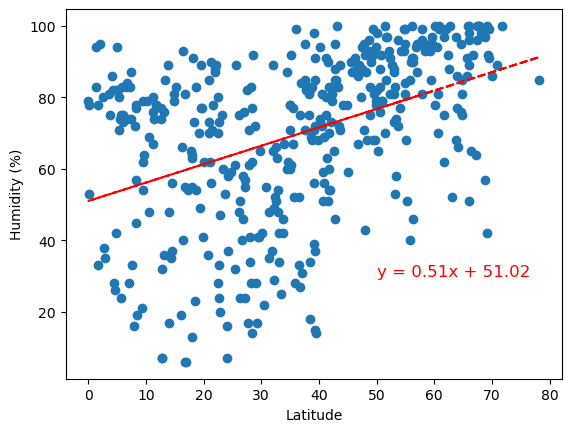

In [39]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],(50, 30))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

The r-value is 0.252863487093048


Text(0, 0.5, 'Humidity (%)')

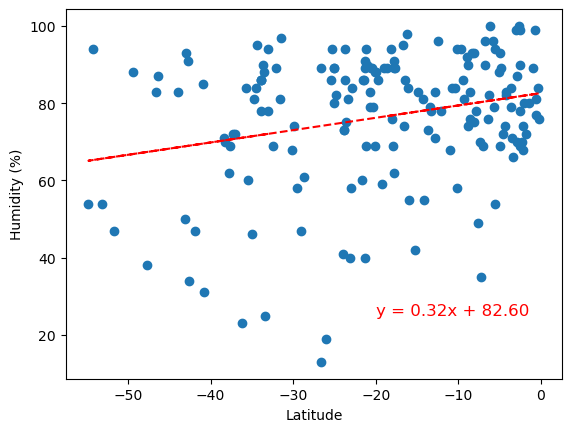

In [41]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],(-20, 25))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

**Discussion about the linear relationship:** 
The humidity vs latitude for the northern hemisphere has a moderately weak positive correlation of 0.426, meaning that not all cities in the northern hemisphere can expect to see an increase in humidity with an increase in latitude. However, this value is almost double than that of the southern hemisphere, meaning there is a higher correlation between humidity and latitude in the northern hemisphere. 

The humidity vs latitude for the southern hemisphere has an even weaker positive correlation of 0.253, meaning most of the data will not be supported by a positive correlation between humidity and latitude where the increase in latitude will also result in an increase in humidity. This correlation is even less than that of the northern hemisphere, indicating that humidity would increase less per change in latitude when compared to the equivalent location in the northern hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.16365625520670335


Text(0, 0.5, 'Cloudiness (%)')

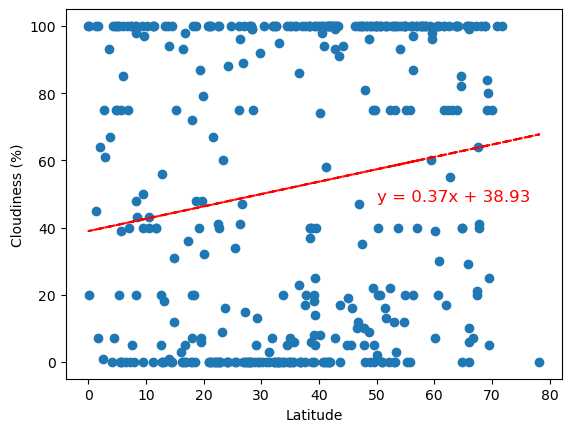

In [47]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],(50, 48))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

The r-value is 0.3376523590119107


Text(0, 0.5, 'Cloudiness (%)')

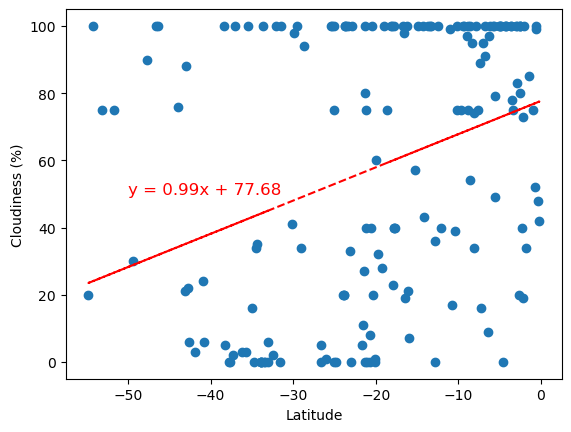

In [49]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],(-50, 50))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

**Discussion about the linear relationship:** 
The cloudiness vs latitude in the northern hemisphere has a weak positive correlation of 0.164, indicating that there is a weak relationship between cloudiness and latitude where the cities' cloudiness will not increase by much as the latitude increases. 

The cloudiness vs latitude in the southern hemisphere has a moderately weak positive correlation of 0.338, which is more than double the correlation coefficient of the northern hemisphere. This indicates that the southern hemisphere has a stronger correlation between cloudiness and latitude and can expect to see cities with a more consistent increase in cloudiness vs an increase in latitude relative to the northern hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.06998338408160115


Text(0, 0.5, 'Wind Speed (m/s)')

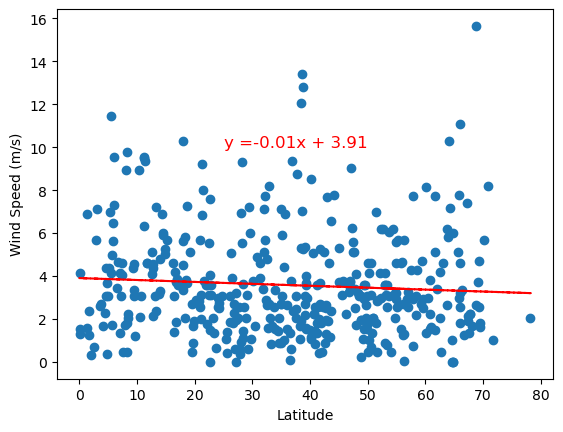

In [54]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],(25, 10))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

The r-value is -0.2643886430363124


Text(0, 0.5, 'Wind Speed (m/s)')

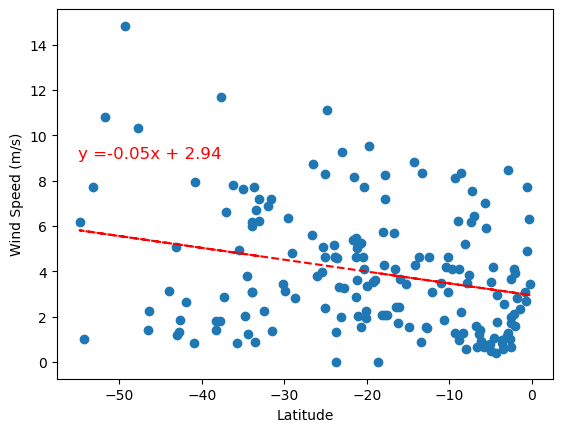

In [55]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],(-55, 9))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

**Discussion about the linear relationship:** 
The wind speed vs latitude in the northern hemisphere has a very weak negative correlation of -0.070. This very weak negative correlation indicates that there would be very little decrease in the wind speed as the latitude increases in the northern hemisphere. 

The wind speed vs latitude in the southern hemisphere has a weak negative correlation of -0.264, which is more than triple that that of the northern hemisphere's. As the correlation for the southern hemisphere is stronger, we can expect to see a more consistent decrease in the wind speed as latitude increases for the southern hemisphere.